In [ ]:
# install the modules if necessary
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib

In [ ]:
# run this cell to import all the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# establish variables
file_one = "Frage_1_modUTF.csv"
file_all = "Frage_all_modUTF.csv"

In [ ]:
# read the csv file
results = pd.read_csv(
    file_one, delimiter=";"
)  # change delimiter to your needs
# display(results)
results.head()

,Alter,Geschlecht,Output,Umgebung,Hoerschaedigung,Gruppe,Verstaendnis,Stimmerkennung
0,35-44,Männlich,In-Ear Kopfhörer,2,Nein,5,FALSCH,Korrekt
1,35-44,Männlich,Lautsprecher,2,Nein,1,Korrekt,FALSCH
2,25-34,Weiblich,On-Ear/Over-Ear Kopfhörer,1,Nein,5,FALSCH,Korrekt
3,45-54,Männlich,On-Ear/Over-Ear Kopfhörer,2,Nein,4,Korrekt,Korrekt
4,25-34,Weiblich,In-Ear Kopfhörer,2,Nein,1,Korrekt,Korrekt


In [ ]:
# select subsection of df for sex and understanding
verst_df = (
    results[["Geschlecht", "Verstaendnis"]]
    .groupby(["Geschlecht", "Verstaendnis"])
    .size()
    .reset_index(name="Count")
)
verst_df

,Geschlecht,Verstaendnis,Count
0,Divers,Korrekt,1
1,Männlich,FALSCH,4
2,Männlich,Korrekt,21
3,Weiblich,FALSCH,8
4,Weiblich,Korrekt,23


For seaborn: Single-hue and multi-hue (up to three) options, which are: Greys , Reds , Greens , Blues , Oranges , Purples , BuGn , BuPu , GnBu , OrRd , PuBu , PuRd , RdPu , YlGn , PuBuGn , YlGnBu , YlOrBr and YlOrRd

use them by selecting

palette="Greys"

for example

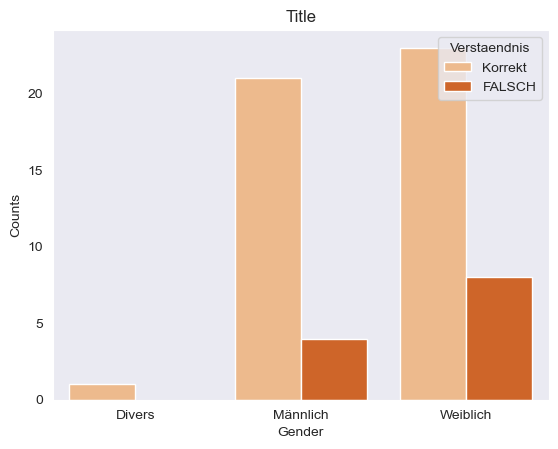

In [ ]:
# prepare graphic representation
sns.set_style("dark")
sns.barplot(
    x="Geschlecht", y="Count", data=verst_df, hue="Verstaendnis", palette="Oranges"
)

plt.title("Title")
plt.xlabel("Gender")
plt.ylabel("Counts")
# plt.xticks(rotation=90) # rotate labels by 90°
plt.show()

In [ ]:
# subset of df for sex and recognition
stimm_df = (
    results[["Geschlecht", "Stimmerkennung"]]
    .groupby(["Geschlecht", "Stimmerkennung"])
    .size()
    .reset_index(name="Count")
)
stimm_df

,Geschlecht,Stimmerkennung,Count
0,Divers,Korrekt,1
1,Männlich,FALSCH,4
2,Männlich,Korrekt,21
3,Weiblich,FALSCH,6
4,Weiblich,Korrekt,25


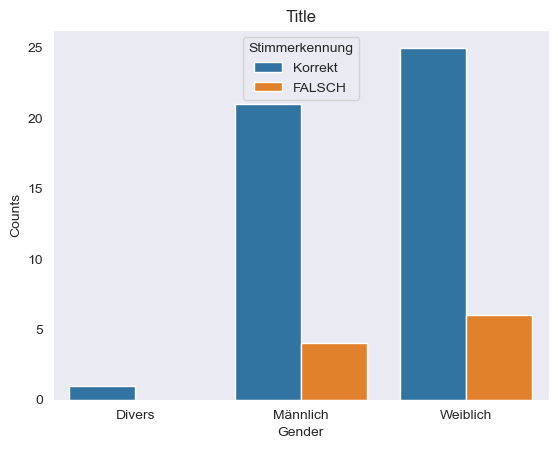

In [ ]:
# prepare plot for sex and recognition
sns.set_style("dark")
sns.barplot(x="Geschlecht", y="Count", data=stimm_df, hue="Stimmerkennung")

plt.title("Title")
plt.xlabel("Gender")
plt.ylabel("Counts")
# plt.xticks(rotation=90) # rotate labels by 90°
plt.show()


In [ ]:
# load complete file
df = pd.read_csv(file_all, delimiter=";")
df.head()

,Alter,Geschlecht,Output,Umgebung,Hoerschaedigung,Gruppe,Verstaendnis1,Stimmerkennung1,Verstaendnis2,Stimmerkennung2,Verstaendnis3,Stimmerkennung3,Verstaendnis4,Stimmerkennung4,Verstaendnis5,Stimmerkennung5
0,35-44,Männlich,In-Ear Kopfhörer,2,Nein,5,FALSCH,Korrekt,Korrekt,FALSCH,Korrekt,Korrekt,Korrekt,FALSCH,Korrekt,FALSCH
1,35-44,Männlich,Lautsprecher,2,Nein,1,Korrekt,FALSCH,Korrekt,FALSCH,Korrekt,Korrekt,Korrekt,FALSCH,Korrekt,Korrekt
2,25-34,Weiblich,On-Ear/Over-Ear Kopfhörer,1,Nein,5,FALSCH,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt
3,45-54,Männlich,On-Ear/Over-Ear Kopfhörer,2,Nein,4,Korrekt,Korrekt,Korrekt,FALSCH,Korrekt,Korrekt,Korrekt,Korrekt,Korrekt,FALSCH
4,25-34,Weiblich,In-Ear Kopfhörer,2,Nein,1,Korrekt,Korrekt,Korrekt,FALSCH,Korrekt,Korrekt,Korrekt,FALSCH,Korrekt,Korrekt


In [9]:
minidf = df[
    [
        "Geschlecht",
        "Verstaendnis1",
        "Verstaendnis2",
        "Verstaendnis3",
        "Verstaendnis4",
        "Verstaendnis5",
    ]
]
bestdf = minidf.rename(columns=
    {
        "Geschlecht": "Gender",
        "Verstaendnis1": "Q1",
        "Verstaendnis2": "Q2",
        "Verstaendnis3": "Q3",
        "Verstaendnis4": "Q4",
        "Verstaendnis5": "Q5",
    }
)
bestdf.head()
bestdf.groupby("Gender").size()

Gender
Divers       1
Männlich    25
Weiblich    31
dtype: int64

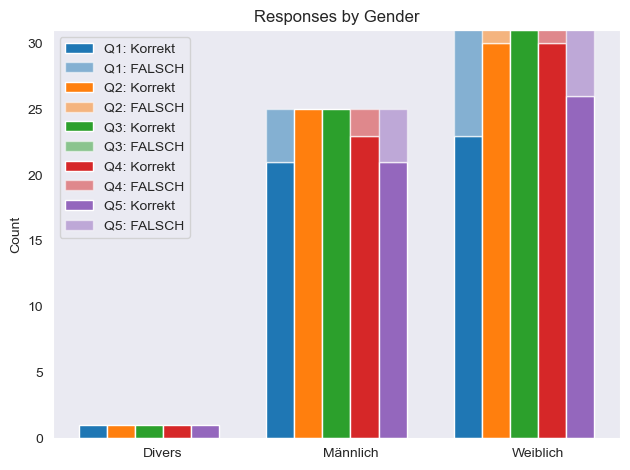

In [10]:
df = bestdf
# Group the data by Gender and count the values for each question
grouped = df.groupby('Gender').apply(lambda x: x.iloc[:, 1:].apply(pd.Series.value_counts)).unstack().reset_index()

# Create the plot
fig, ax = plt.subplots()
width = 0.15  # Width of the bars
spacing = 0.08  # Spacing between the bars for each question

# Get the unique genders
genders = sorted(df['Gender'].unique())
x = np.arange(len(genders))

# Plot the 'Korrekt' and 'FALSCH' counts for each question
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, question in enumerate(questions):
    correct = grouped[question]['Korrekt']
    incorrect = grouped[question]['FALSCH']
    ax.bar(x + (i - len(questions) / 2) * width, correct, width, label=f'{question}: Korrekt', color=colors[i])
    ax.bar(x + (i - len(questions) / 2) * width, incorrect, width, bottom=correct, label=f'{question}: FALSCH', color=colors[i], alpha=0.5)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(genders)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the title and legend
ax.set_title('Responses by Gender')
ax.legend()

plt.tight_layout()
# Show the plot
plt.show()